#### Question 1: Denoising Images with Autoencoders
Dataset Problem: Use the CIFAR-10 dataset to train an autoencoder for denoising images. Add random noise to the CIFAR-10 dataset images and then use the autoencoder to clean the images.
CIFAR is an acronym that stands for the Canadian Institute for Advanced Research and the
CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute. The dataset is comprised of 60,000 32 X 32-pixel color photographs of objects from10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated
integer values are listed below.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [14]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [16]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [17]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [19]:
input_img = Input(shape=(32, 32, 3))

In [23]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


In [24]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [25]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - loss: 0.0138 - val_loss: 0.0090
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 134ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 144ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 12/20
391/391

In [28]:
decoded_imgs = autoencoder.predict(x_test_noisy)
decoded_imgs

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


array([[[[0.50204194, 0.40097064, 0.27728   ],
         [0.52614415, 0.41259816, 0.24831247],
         [0.556674  , 0.4301889 , 0.24098195],
         ...,
         [0.48654574, 0.3847684 , 0.2403783 ],
         [0.42621282, 0.3720133 , 0.23539759],
         [0.4337129 , 0.34995776, 0.2410208 ]],

        [[0.5256253 , 0.40874282, 0.25478747],
         [0.56663394, 0.4356561 , 0.26313326],
         [0.6040891 , 0.45399958, 0.2588056 ],
         ...,
         [0.48180062, 0.37023053, 0.21746926],
         [0.45708442, 0.35093528, 0.21392475],
         [0.42585415, 0.36056572, 0.21729729]],

        [[0.5519883 , 0.41985574, 0.24509645],
         [0.58229077, 0.44472134, 0.2397126 ],
         [0.60297906, 0.44548824, 0.22302562],
         ...,
         [0.46619177, 0.3407277 , 0.19151834],
         [0.43603748, 0.33050758, 0.18259706],
         [0.43217018, 0.3167814 , 0.1805743 ]],

        ...,

        [[0.26137996, 0.38653544, 0.6112412 ],
         [0.23373957, 0.37976876, 0.5926814 ]

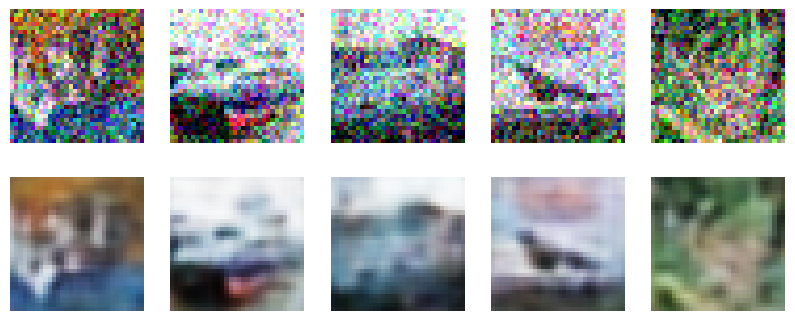

In [31]:
n = 5
plt.figure(figsize=(10,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i])
    plt.axis('off')
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')
plt.show()

#### Question 2: CIFAR-10 dataset reconstruction
Dataset Problem: Use the CIFAR-10 dataset to train an autoencoder. The goal is to input an image of a CIFAR-10 dataset into the autoencoder and have it reconstruct the image as a new output. Use the concept of VAE to solve this problem
CIFAR is an acronym that stands for the Canadian Institute for Advanced Research and the
CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute. The dataset is comprised of 60,000 32 X 32-pixel color photographs of objects from10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated
integer values are listed below.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings('ignore')

In [63]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [64]:
latent_dim = 64


In [75]:
inputs = Input(shape=(32, 32, 3))
x = layers.Flatten()(inputs)
x = layers.Dense(512, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

In [78]:
decoder_input = Input(shape=(latent_dim,))
x = layers.Dense(512, activation="relu")(decoder_input)
x = layers.Dense(32 * 32 * 3, activation="sigmoid")(x)
outputs = layers.Reshape((32, 32, 3))(x)
decoder = Model(decoder_input, outputs, name="decoder")


In [81]:
class VAELossLayer(layers.Layer):
    def call(self, inputs, z_decoded, z_mean, z_log_var):
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(tf.square(inputs - z_decoded), axis=[1, 2, 3])
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        return z_decoded

In [82]:
outputs = VAELossLayer()(inputs, z_decoded, z_mean, z_log_var)
vae = Model(inputs, outputs, name="vae")
vae.compile(optimizer="adam")
vae.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 3072)      │          0 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 512)       │  1,573,376 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 64)        │     32,832 │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 64)        │     32,832 │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 64)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 32, 32, 3) │  1,609,216 │ z[0][0]           │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vae_loss_layer      │ (None, 32, 32, 3) │          0 │ input_layer_13[0… │
│ (VAELossLayer)      │                   │            │ decoder[0][0],    │
│                     │                   │            │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,248,256 (12.39 MB)

 Trainable params: 3,248,256 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
vae.fit(x_train, epochs=10, batch_size=128, validation_data=(x_test, None))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - loss: 135.2850 - val_loss: 110.9714
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 101.9650 - val_loss: 95.7039
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - loss: 92.9910 - val_loss: 91.4191
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - loss: 89.2950 - val_loss: 87.9000
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - loss: 87.3038 - val_loss: 87.0230
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - loss: 86.0893 - val_loss: 86.0539
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - loss: 85.4497 - val_loss: 85.7113
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - loss: 84.9214 - val_loss: 85.6626
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - loss: 84.2774 - val_loss: 84.1504
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - loss: 83.5905 - val_loss: 83.7136
